In [1]:
library(Seurat)
library(dplyr)
library(ggpubr)
library(ggplot2)
library(ggbeeswarm)

seurat = readRDS('seurat.RDS')
meta = readRDS('BCRmeta.RDS')
seurat@meta.data = meta[colnames(seurat),]

Warning message:
"package 'Seurat' was built under R version 4.1.3"
Attaching SeuratObject

Attaching sp

Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'ggbeeswarm' was built under R version 4.1.3"


In [2]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)

UMAP_theme <- theme_bw()+theme(axis.text.y = element_blank(), 
                               axis.text.x = element_blank(), 
                               axis.ticks.x= element_blank(),
                               axis.ticks.y= element_blank(),
                               axis.title.x= element_blank(),
                               axis.title.y= element_blank(),
                               strip.text.x = element_text(size = 8),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               panel.border = element_blank(),
                               panel.background = element_rect(colour = "black", fill = NA,size=.355),
                               legend.position = "none",
                               plot.title = element_text(hjust = 0.5, size = 8))

remove_grid = theme_bw() + theme( panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank())

Axis_themes <- theme(plot.title = element_text(size = 8),
                     axis.title = element_text(size = 8), 
                     axis.text = element_text(size = 8),
                     axis.text.x = element_text(size = 8),
                     legend.text = element_text(size =8),
                     legend.title = element_text(size = 8),
                     strip.text.x = element_text(size = 8), 
                    axis.line = element_line(size = .355), 
                    axis.ticks = element_line(size = .177))


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


In [3]:
getwd()

[1] "L:/Duncan/scBCR_method/Pn3Pilot_figures"

In [4]:
DefaultAssay(seurat) = 'RNA'
#seurat = RunPCA(seurat, npcs = 50)
seurat = FindNeighbors(seurat, dims = 1:15)
seurat = FindClusters(seurat, resolution = .2)

seurat@meta.data[,c('UMAP1', 'UMAP2')] = Embeddings(seurat, 'umap')
seurat$cluster = Idents(seurat)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6819
Number of edges: 226366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8748
Number of communities: 4
Elapsed time: 1 seconds


Warning message:
"package 'RColorBrewer' was built under R version 4.1.3"
Warning message:
"package 'ggrastr' was built under R version 4.1.3"
Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4."


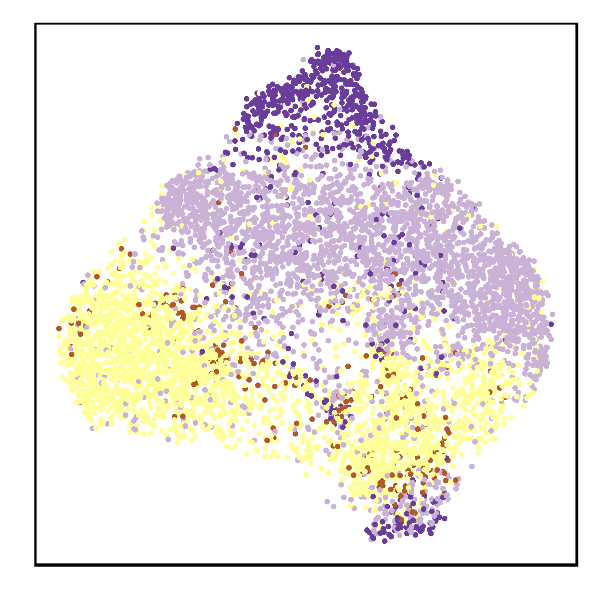

In [5]:
library(RColorBrewer)
library(ggrastr)
options(repr.plot.width = 2, repr.plot.height = 2)
seurat$both = paste0(seurat$Group, '_', seurat$Fraction)
both_palette = brewer.pal(12, 'Paired')[c(10,9,12,11)]
names(both_palette) = c('Vaccine_Pn3+', 'Vaccine_Pn3-', 'Control_Pn3+', 'Control_Pn3-')
ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),], aes(x = UMAP1, y = UMAP2, color = both)) + 
 geom_point_rast(size = .6, stroke = 0, raster.dpi = 1000) + 
theme_classic() + guides(color = FALSE) + UMAP_theme + 
scale_color_manual(values = both_palette)
ggsave('Pheno/UMAPsample.pdf', height =2, width = 2, useDingbats = FALSE)

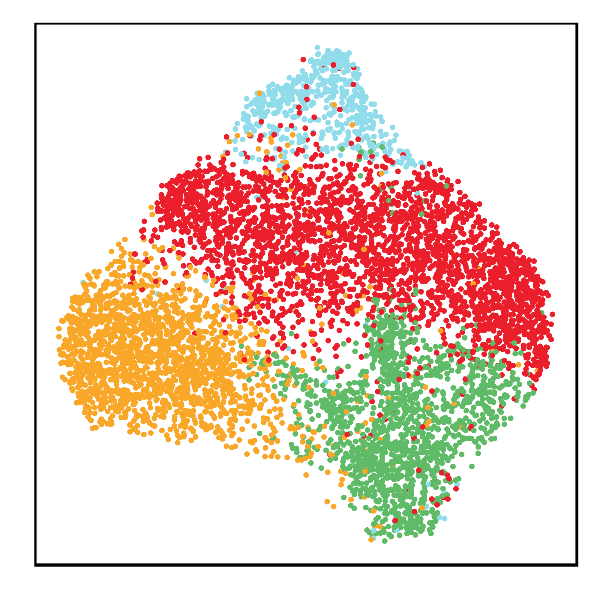

In [6]:
library(ggthemes)
options(repr.plot.width = 2, repr.plot.height = 2)

phenotype_palette =ggthemes_data[['tableau']][['color-palettes']]$regular$`Jewel Bright`$value[c(1,3,5,7)]

seurat$cluster_name = 'Naive-like'
seurat$cluster_name[seurat$cluster == 1] = 'Fos-activated'
seurat$cluster_name[seurat$cluster == 2] = 'MBC-like'
seurat$cluster_name[seurat$cluster == 3] = 'B2M^hi'
seurat$cluster_name = factor(seurat$cluster_name, c('Naive-like', 'Fos-activated', 'MBC-like', 'B2M^hi'))

names(phenotype_palette) = levels(seurat$cluster_name)
ggplot(seurat@meta.data, aes(x = UMAP1, y = UMAP2, color = cluster_name)) + 
 geom_point_rast(size = .6, stroke = 0, raster.dpi = 1000) + 
theme_classic() + guides(color = FALSE) + UMAP_theme + 
scale_color_manual(values = phenotype_palette)
ggsave('Pheno/UMAPcluster.pdf', height =2, width = 2, useDingbats = FALSE)

character(0)

[1] "CD79B"              "IGHM"               "ENSMMUG00000057110"
 [4] "FCER2"              "PAX5"               "GPR183"            
 [7] "ITGAX"              "ITGB2"              "EGR1"              
[10] "FOS"                "JCHAIN"             "REL"               
[13] "CD83"               "CCR6"               "CCR7"              
[16] "CD38"               "ENSMMUG00000015270" "CD1C"              
[19] "MAMU-DRA"           "ITGB1"

Warning message:
"package 'viridis' was built under R version 4.1.3"
Loading required package: viridisLite

Warning message:
"package 'viridisLite' was built under R version 4.1.3"


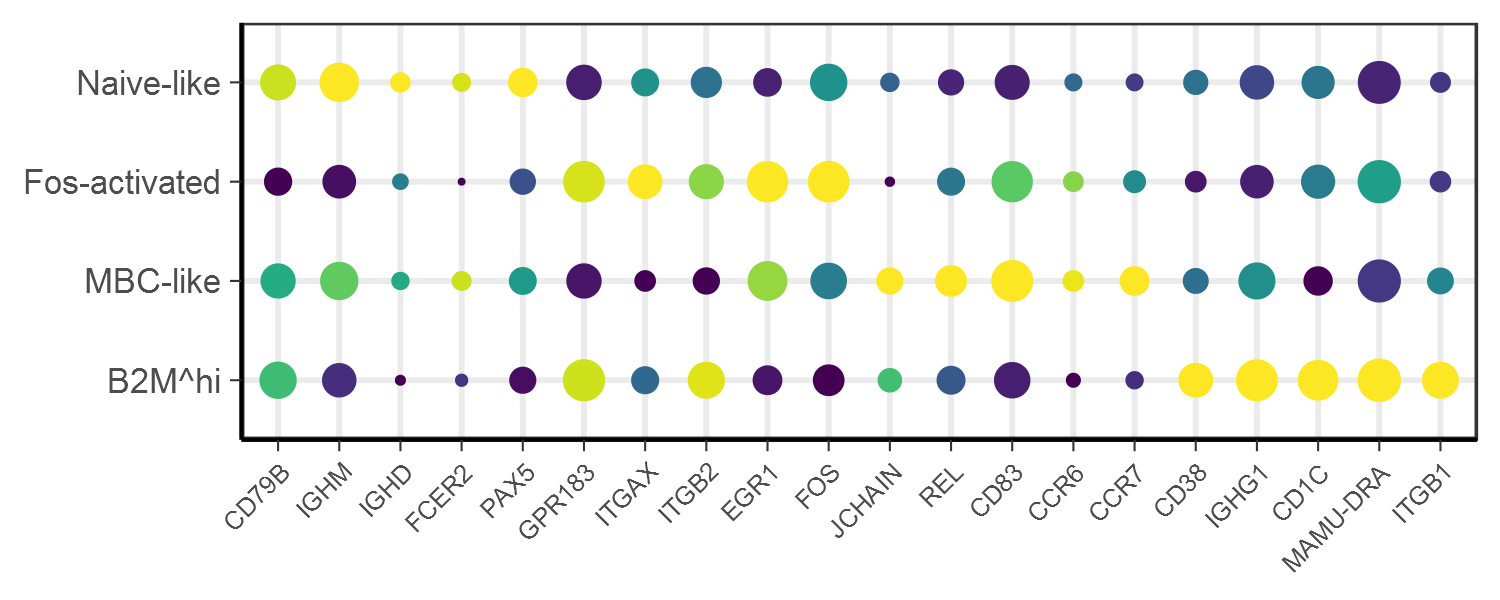

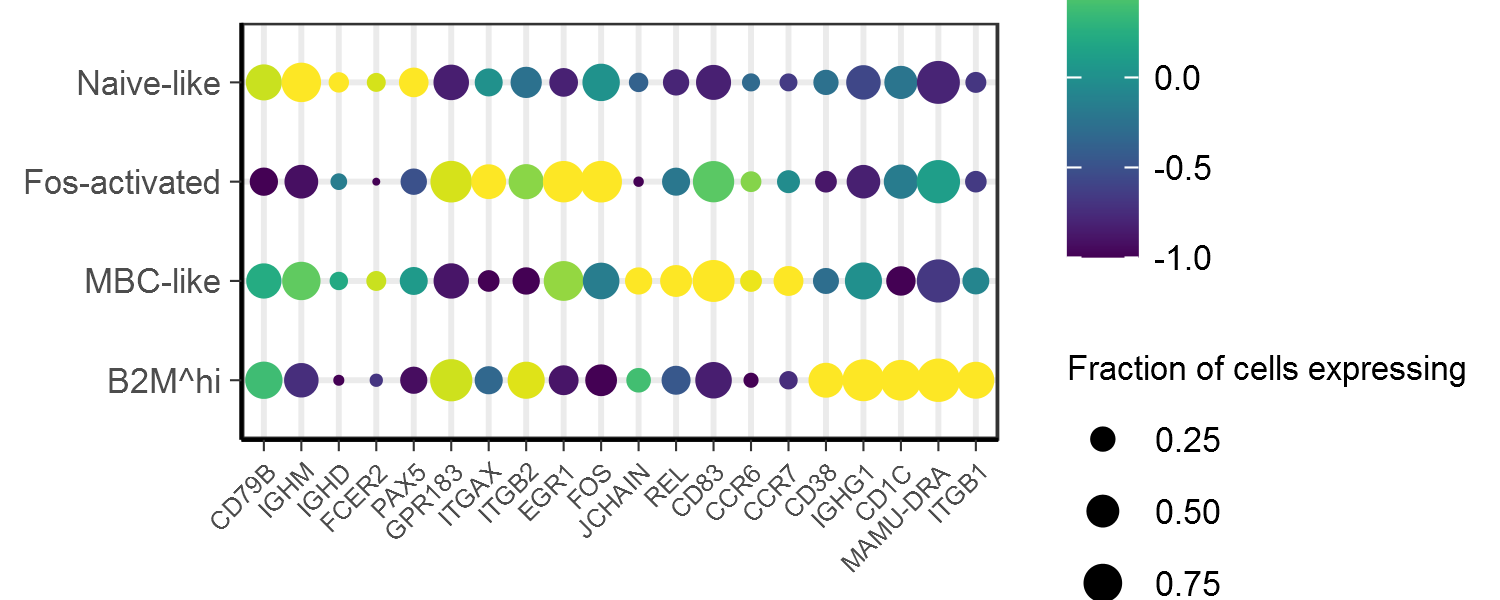

In [7]:
options(repr.plot.width = 5)
DefaultAssay(seurat) = 'RNA'
genes = c('CD79B','IGHM', 'ENSMMUG00000057110',  'FCER2', 'PAX5',
          'GPR183', 'ITGAX', 'ITGB2', 'EGR1', 'FOS',
          'JCHAIN', 'REL', 'CD83', 'CCR6',"CCR7",
          'CD38','ENSMMUG00000015270', 'CD1C', 'MAMU-DRA', 'ITGB1')
genes[!genes %in% rownames(seurat)]
genes = genes[genes %in% rownames(seurat)]
genes
labels = genes
labels[3] = 'IGHD'
labels[genes == 'ENSMMUG00000015270'] = 'IGHG1'
pct = function(x) {
  sum(x >0)/length(x)
}
meanexp = function(x) {
    mean(x)
}

data = as.data.frame(t(as.matrix(GetAssayData(seurat)[genes,])))

library(reshape2)
library(viridis)
data$phenotype = seurat$cluster_name
df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame() 
df_exp[,2:(1+length(genes))] = scale(df_exp[,2:(1+length(genes))])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype) %>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value > 1] = 1
df_exp$value[df_exp$value < -1]= -1

df_exp$pct = df_pct$value

lvs = levels(factor(df_exp$phenotype))

ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point() + scale_color_viridis()  + 
 theme_bw()  + theme(axis.title = element_blank(), axis.text.x = element_text(angle = 90)) + guides(size = FALSE, color = FALSE) + 
labs(color = "Mean expression", size = 'Fraction of cells expressing') + scale_x_discrete(limits = genes, labels = labels) + Axis_themes + 
theme(axis.title = element_blank(), axis.text.x = element_text(size = 6, hjust = 1, angle = 45)) + scale_y_discrete(limits = rev(lvs))+ scale_size_continuous(range = c(.01, 4), breaks = c(0,.25, .5, .75))

ggsave('Pheno/dots.pdf', useDingbats = FALSE, width = 2.9, height = 1.75)

ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point() + scale_color_viridis()  + 
 theme_bw()  + theme(axis.title = element_blank(), axis.text.x = element_text(angle = 90)) + 
labs(color = "Mean expression", size = 'Fraction of cells expressing') + scale_x_discrete(limits = genes, labels = labels) + Axis_themes + 
theme(axis.title = element_blank(), axis.text.x = element_text(size = 6, hjust = 1, angle = 45)) + scale_y_discrete(limits = rev(lvs))+ scale_size_continuous(range = c(.01, 4), breaks = c(0,.25, .5, .75))

ggsave('Pheno/dots_legend.pdf', useDingbats = FALSE, width = 5, height = 3)

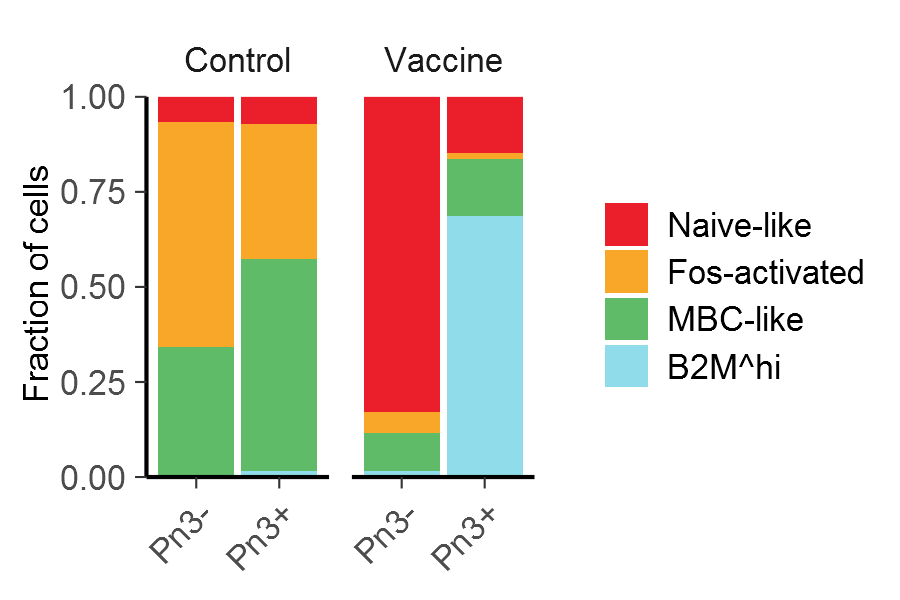

In [8]:
options(repr.plot.width = 3)

ggplot(seurat@meta.data, aes(x = Fraction, fill = cluster_name)) + geom_bar(position = 'fill') + facet_wrap('Group') + scale_fill_manual(values = phenotype_palette) + theme_classic() + 
Axis_themes + scale_y_continuous(expand = c(0,0)) + labs(x = c(), y = 'Fraction of cells', fill = c()) + 
theme(strip.background = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1), legend.key.size = unit(.4, 'cm')) 

ggsave('Pheno/bars.pdf', width = 2.5, height =2, useDingbats = FALSE)

In [9]:
table(seurat$cluster_name)


   Naive-like Fos-activated      MBC-like        B2M^hi 
         2930          1867          1469           553 


         0          4 background 
         7         19       6063 

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"Removed 6063 rows containing missing values (`geom_text_repel()`)."
Warning message:
"Removed 6063 rows containing missing values (`geom_text_repel()`)."


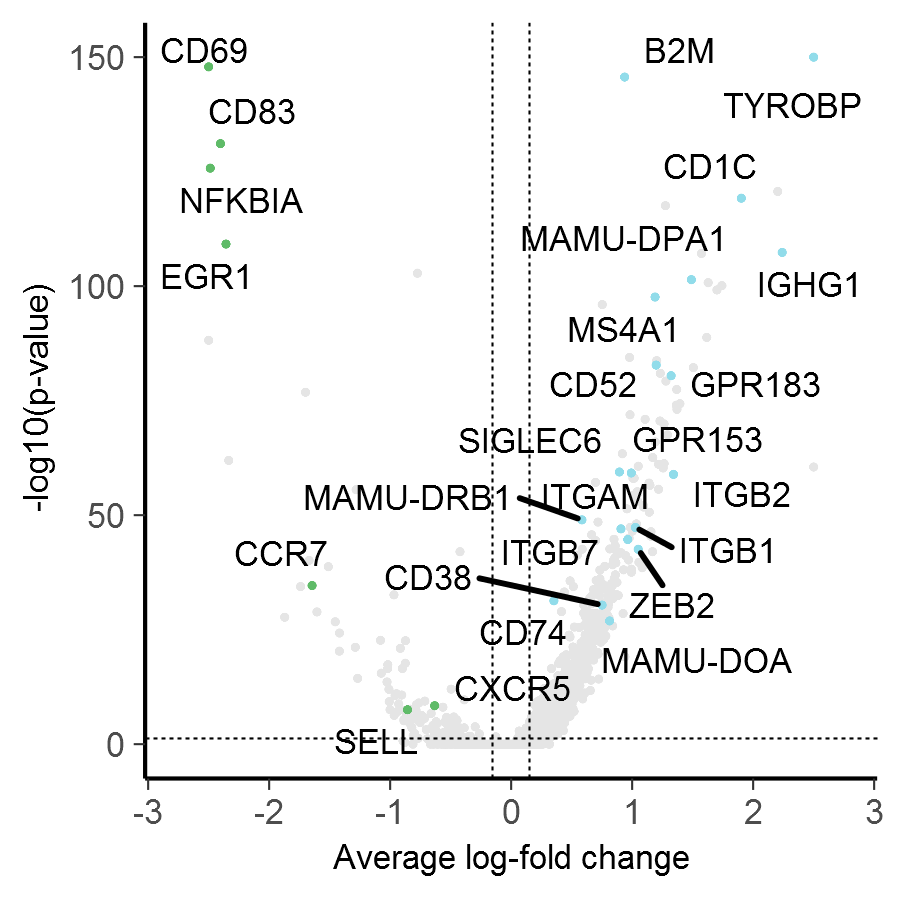

In [10]:
library(ggrastr)
options(repr.plot.width = 3, repr.plot.height = 3)
DefaultAssay(seurat) = 'RNA'
Idents(seurat) = 'cluster_name'
pos.genes = FindMarkers(seurat, 'B2M^hi', 'MBC-like', logfc.threshold = 0, min.pct = .05)
library(ggrepel)

markers.plot =c('TYROBP', 'CD69', 'B2M', 'CD83', 'NFKBIA', 'CD1C', 'EGR1', 'MS4A1', 'CD52', 'GPR153', 'GPR183', 'SIGLEC6', 'ITGB2', 'CXCR5', 'SELL', 'SIBLEC10', 'MAMU-DRB1', 'ITGB1', 'ITGAM', 'ITGB7', 'ZEB2', 
  'CCR7', 'CD38', 'CD74', "MAMU-DRB1", 'MAMU-DOA', '')
labels  = markers.plot
names(labels) = markers.plot
labels['ENSMMUG00000015202'] = "IGHG1"
labels['ENSMMUG00000056183'] = "MAMU-DPA1"

a = pos.genes
a$format_gene = labels[rownames(a)]
a$label = a$format_gene
a$label[!a$format_gene %in% markers.plot] = NA
a['ENSMMUG00000015202', 'label'] = 'IGHG1'
a['ENSMMUG00000056183', 'label'] = "MAMU-DPA1"

a$avg_log2FC[a$avg_log2FC < -2.5] = -2.5
a$avg_log2FC[a$avg_log2FC > 2.5] = 2.5

a$color = 'background'
a$color[!is.na(a$label)] = '4'
a$color[!is.na(a$label) & (a$avg_log2FC < 0)] = '0'
a$p_val_plot = a$p_val_adj
a$p_val_plot[a$p_val_adj < 1e-150] = 1e-150

table(a$color)

ggplot(a %>% arrange(!is.na(label)), aes(x = avg_log2FC, y = -log10(p_val_plot), color = factor(color))) + geom_point_rast(size = 1, stroke = 0, raster.dpi = 1000
                                                                                                                          ) + 
theme_classic() + Axis_themes + labs(x = 'Average log-fold change', y = '-log10(p-value)') + 
guides(color = FALSE) + geom_text_repel(aes(label = label), size = 2.11667*8/6, color = 'black', max.overlaps = 200) + scale_color_manual(values = c(unname(phenotype_palette[c( 'MBC-like','B2M^hi' )]), 'grey90')) + 
geom_hline(yintercept = -log10(.05), linetype = 'dashed', size = .177) + geom_vline(xintercept = .15, linetype = 'dashed', size = .177) + geom_vline(xintercept = -.15, linetype = 'dashed', size = .177) + 
scale_x_continuous(limits = c(-2.75, 2.75)) + scale_y_continuous(limits = c(0, 150))

ggsave('Pheno/volcano1.pdf', height = 3, width = 3, useDingbats = FALSE)
write.table(pos.genes, 'b2m_mbc_markers.csv', quote = FALSE, row.names = TRUE, sep = ',')


         0          4 background 
         4         14       4629 

Warning message:
"Removed 4629 rows containing missing values (`geom_text_repel()`)."
Warning message:
"Removed 4629 rows containing missing values (`geom_text_repel()`)."


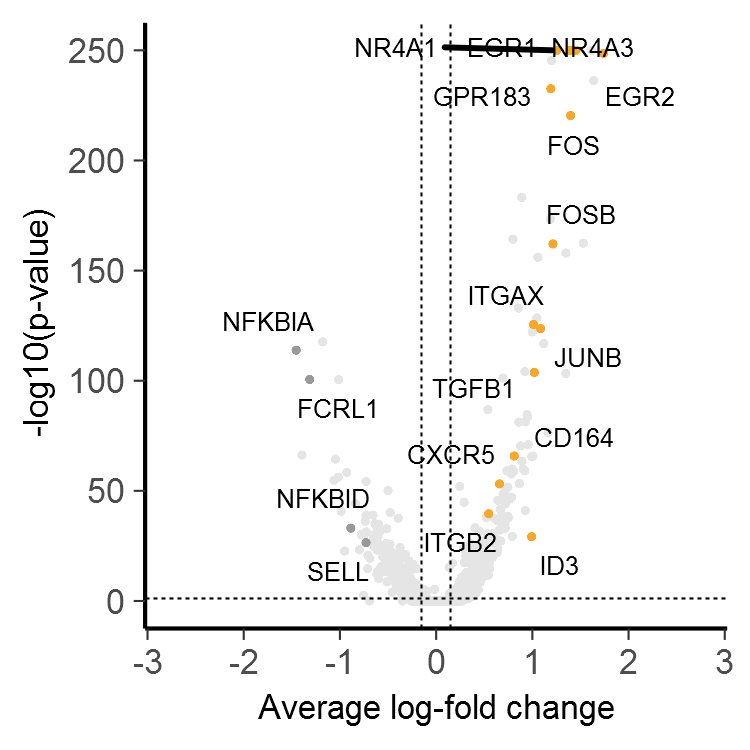

In [11]:
options(repr.plot.width = 2.5, repr.plot.height = 2.5)
DefaultAssay(seurat) = 'RNA'
Idents(seurat) = 'cluster_name'
fos.genes = FindMarkers(seurat, 'Fos-activated', logfc.threshold = 0, min.pct = .05)
library(ggrepel)

markers.plot =c('EGR1', 'NR4A1', 'NR4A3', 'EGR2', 'GPR183', 'FOS','FOSB', 'JUNB', 'ITGAX', 'TGFB1', 'FCRL1', 'CXCR5', 'CD164', 
  'ITGB2', 'ID3', 'SELL', 'NFKBIA', 'NFKBID')
labels  = markers.plot
names(labels) = markers.plot

a = fos.genes
a$format_gene = labels[rownames(a)]
a$label = a$format_gene
a$label[!a$format_gene %in% markers.plot] = NA

a$avg_log2FC[a$avg_log2FC < -2.5] = -2.5
a$avg_log2FC[a$avg_log2FC > 2.5] = 2.5

a$color = 'background'
a$color[!is.na(a$label)] = '4'
a$color[!is.na(a$label) & (a$avg_log2FC < 0)] = '0'
a$p_val_plot = a$p_val_adj
a$p_val_plot[a$p_val_adj < 1e-250] = 1e-250

table(a$color)

ggplot(a %>% arrange(!is.na(label)), aes(x = avg_log2FC, y = -log10(p_val_plot), color = factor(color))) + geom_point_rast(size = 1, stroke = 0, raster.dpi = 1000) + 
theme_classic() + Axis_themes + labs(x = 'Average log-fold change', y = '-log10(p-value)') + 
guides(color = FALSE) + geom_text_repel(aes(label = label), size = 2.11667, color = 'black') + scale_color_manual(values = c('grey60',unname(phenotype_palette[c( 'Fos-activated' )]), 'grey90')) + 
geom_hline(yintercept = -log10(.05), linetype = 'dashed', size = .177) + geom_vline(xintercept = .15, linetype = 'dashed', size = .177) + geom_vline(xintercept = -.15, linetype = 'dashed', size = .177) + 
scale_x_continuous(limits = c(-2.75, 2.75)) + scale_y_continuous(limits = c(0, 250))

ggsave('Pheno/volcano_fos.pdf', height = 2, width = 2.5, useDingbats = FALSE)



         0          4 background 
         8          5       4636 

Warning message:
"Removed 4636 rows containing missing values (`geom_text_repel()`)."


ERROR: Error in grDevices::pdf(file = filename, ..., version = version): cannot open file 'Pheno/volcano_naive.pdf'


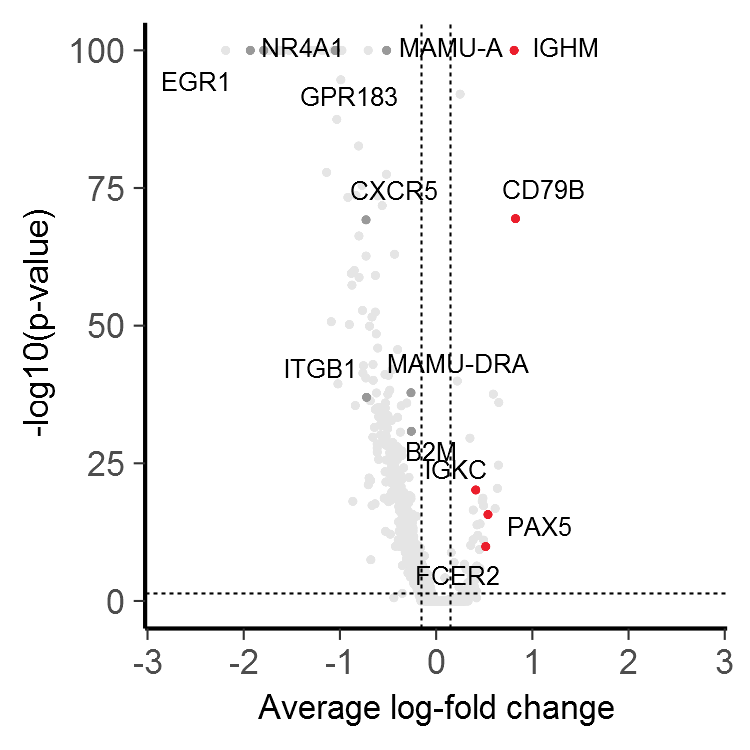

In [12]:
options(repr.plot.width = 2.5, repr.plot.height = 2.5)
DefaultAssay(seurat) = 'RNA'
Idents(seurat) = 'cluster_name'
naive.genes = FindMarkers(seurat, 'Naive-like', logfc.threshold = 0, min.pct = .05)
library(ggrepel)

markers.plot =c('EGR1', 'NR4A1', 'BLC2A1', 'MAMU-A', 'GPR183', 'CXCR5', 'IGHM', 'CD79B', 'IGKC', 'PAX5', 'FCER2','ITGB1', 'MAMU-DRA', 'B2M')
labels  = markers.plot
names(labels) = markers.plot

a = naive.genes
a$format_gene = labels[rownames(a)]
a$label = a$format_gene
a$label[!a$format_gene %in% markers.plot] = NA

a$avg_log2FC[a$avg_log2FC < -2.5] = -2.5
a$avg_log2FC[a$avg_log2FC > 2.5] = 2.5

a$color = 'background'
a$color[!is.na(a$label)] = '4'
a$color[!is.na(a$label) & (a$avg_log2FC < 0)] = '0'
a$p_val_plot = a$p_val_adj
a$p_val_plot[a$p_val_adj < 1e-100]= 1e-100

table(a$color)

ggplot(a %>% arrange(!is.na(label)), aes(x = avg_log2FC, y = -log10(p_val_plot), color = factor(color))) + geom_point_rast(size = 1, stroke = 0, raster.dpi = 1000) + 
theme_classic() + Axis_themes + labs(x = 'Average log-fold change', y = '-log10(p-value)') + 
guides(color = FALSE) + geom_text_repel(aes(label = label), size = 2.11667, color = 'black') + scale_color_manual(values = c('grey60',unname(phenotype_palette[c( 'Naive-like' )]), 'grey90')) + 
geom_hline(yintercept = -log10(.05), linetype = 'dashed', size = .177) + geom_vline(xintercept = .15, linetype = 'dashed', size = .177) + geom_vline(xintercept = -.15, linetype = 'dashed', size = .177) + 
scale_x_continuous(limits = c(-2.75, 2.75)) + scale_y_continuous(limits = c(0, 100))

ggsave('Pheno/volcano_naive.pdf', height = 2, width = 2.5, useDingbats = FALSE)


In [ ]:
save.image('20230227_pheno_figure.RDATA')